In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2babbfd7ca6eae3765391a717218905b


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | qixia
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | rosita
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | zhicheng
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | port-gentil
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | arman
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | lompoc
Processing Record 23 of Set 1 | bandarbeyla
Processing Record 24 of Set 1 | belushya guba
City not found. Skipping...
Pr

Processing Record 38 of Set 4 | padang
Processing Record 39 of Set 4 | nikolayevsk-na-amure
Processing Record 40 of Set 4 | high rock
Processing Record 41 of Set 4 | aswan
Processing Record 42 of Set 4 | siparia
Processing Record 43 of Set 4 | edeia
Processing Record 44 of Set 4 | whitehorse
Processing Record 45 of Set 4 | kumano
Processing Record 46 of Set 4 | haines junction
Processing Record 47 of Set 4 | taggia
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | brufut
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | devonport
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | santa fe
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | san-pedro
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | rundu
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | talaya
Processing Record 

Processing Record 32 of Set 8 | togur
Processing Record 33 of Set 8 | brae
Processing Record 34 of Set 8 | krasnozerskoye
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | itarema
Processing Record 37 of Set 8 | tupelo
Processing Record 38 of Set 8 | roura
Processing Record 39 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 8 | marquette
Processing Record 41 of Set 8 | ngunguru
Processing Record 42 of Set 8 | usinsk
Processing Record 43 of Set 8 | marawi
Processing Record 44 of Set 8 | hobyo
Processing Record 45 of Set 8 | geraldton
Processing Record 46 of Set 8 | kupang
Processing Record 47 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 48 of Set 8 | karaman
Processing Record 49 of Set 8 | bargal
City not found. Skipping...
Processing Record 50 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 9 | talnakh
Processing Record 2 of Set 9 | awjilah
Processing Record 3

Processing Record 19 of Set 12 | turkmenabat
Processing Record 20 of Set 12 | macapa
Processing Record 21 of Set 12 | wewak
Processing Record 22 of Set 12 | dalton
Processing Record 23 of Set 12 | tiznit
Processing Record 24 of Set 12 | aden
Processing Record 25 of Set 12 | elat
Processing Record 26 of Set 12 | bereda
Processing Record 27 of Set 12 | basco
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | marsa matruh
Processing Record 30 of Set 12 | sungai padi
Processing Record 31 of Set 12 | laem sing
Processing Record 32 of Set 12 | terekli-mekteb
Processing Record 33 of Set 12 | icod de los vinos
Processing Record 34 of Set 12 | old bridge
Processing Record 35 of Set 12 | qingdao
Processing Record 36 of Set 12 | beinamar
Processing Record 37 of Set 12 | auburn
Processing Record 38 of Set 12 | rawson
Processing Record 39 of Set 12 | mergui
City not found. Skipping...
Processing Record 40 of Set 12 | aloleng
Processing Record 41 of Set 12 | deputatskiy
Proce

In [10]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.66,75,14,11.39,PF,2022-07-18 22:40:41
1,Nikolskoye,59.7035,30.7861,55.80,92,59,4.63,RU,2022-07-18 22:40:41
2,Qixia,37.2975,120.8256,76.50,59,22,0.38,CN,2022-07-18 22:40:42
3,Saskylakh,71.9167,114.0833,44.19,80,100,13.53,RU,2022-07-18 22:39:55
4,Rosita,13.9268,-84.4032,78.17,96,100,3.58,NI,2022-07-18 22:40:42
5,Busselton,-33.6500,115.3333,50.23,86,0,8.25,AU,2022-07-18 22:40:43
6,Hobart,-42.8794,147.3294,43.27,85,75,6.91,AU,2022-07-18 22:40:43
7,Zhicheng,30.2956,111.5047,78.30,92,96,3.51,CN,2022-07-18 22:40:43
8,Vostok,46.4856,135.8833,67.60,77,85,2.17,RU,2022-07-18 22:40:43
9,Cabo San Lucas,22.8909,-109.9124,94.60,63,9,3.00,MX,2022-07-18 22:40:44


In [12]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-18 22:40:41,-23.1203,-134.9692,74.66,75,14,11.39
1,Nikolskoye,RU,2022-07-18 22:40:41,59.7035,30.7861,55.80,92,59,4.63
2,Qixia,CN,2022-07-18 22:40:42,37.2975,120.8256,76.50,59,22,0.38
3,Saskylakh,RU,2022-07-18 22:39:55,71.9167,114.0833,44.19,80,100,13.53
4,Rosita,NI,2022-07-18 22:40:42,13.9268,-84.4032,78.17,96,100,3.58
5,Busselton,AU,2022-07-18 22:40:43,-33.6500,115.3333,50.23,86,0,8.25
6,Hobart,AU,2022-07-18 22:40:43,-42.8794,147.3294,43.27,85,75,6.91
7,Zhicheng,CN,2022-07-18 22:40:43,30.2956,111.5047,78.30,92,96,3.51
8,Vostok,RU,2022-07-18 22:40:43,46.4856,135.8833,67.60,77,85,2.17
9,Cabo San Lucas,MX,2022-07-18 22:40:44,22.8909,-109.9124,94.60,63,9,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

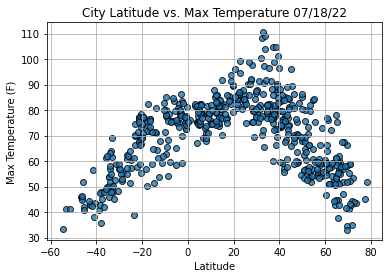

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

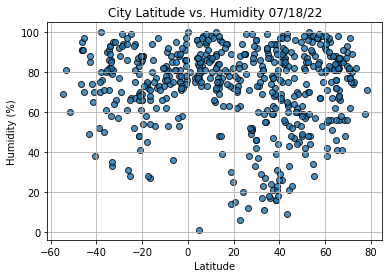

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

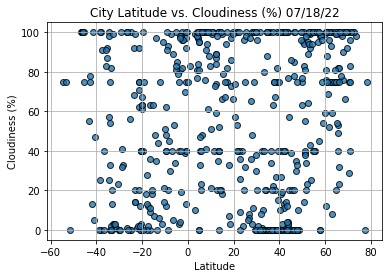

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

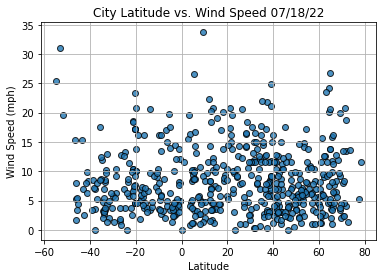

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2022-07-18 22:35:52
Lat                       69.4541
Lng                     -133.0374
Max Temp                     66.2
Humidity                       77
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
548    False
549     True
550     True
551     True
552    False
Name: Lat, Length: 553, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2022-07-18 22:40:41,59.7035,30.7861,55.80,92,59,4.63
2,Qixia,CN,2022-07-18 22:40:42,37.2975,120.8256,76.50,59,22,0.38
3,Saskylakh,RU,2022-07-18 22:39:55,71.9167,114.0833,44.19,80,100,13.53
4,Rosita,NI,2022-07-18 22:40:42,13.9268,-84.4032,78.17,96,100,3.58
7,Zhicheng,CN,2022-07-18 22:40:43,30.2956,111.5047,78.30,92,96,3.51
...,...,...,...,...,...,...,...,...,...
545,Deputatskiy,RU,2022-07-18 22:54:05,69.3000,139.9000,41.61,87,100,3.69
547,Cherskiy,RU,2022-07-18 22:54:06,68.7500,161.3000,57.92,48,66,9.64
549,Seoul,KR,2022-07-18 22:54:06,37.5683,126.9778,78.37,85,75,2.30
550,Los Llanos De Aridane,ES,2022-07-18 22:54:07,28.6585,-17.9182,69.55,93,75,18.41


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2022-07-18 22:40:41,59.7035,30.7861,55.80,92,59,4.63
2,Qixia,CN,2022-07-18 22:40:42,37.2975,120.8256,76.50,59,22,0.38
3,Saskylakh,RU,2022-07-18 22:39:55,71.9167,114.0833,44.19,80,100,13.53
4,Rosita,NI,2022-07-18 22:40:42,13.9268,-84.4032,78.17,96,100,3.58
7,Zhicheng,CN,2022-07-18 22:40:43,30.2956,111.5047,78.30,92,96,3.51


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

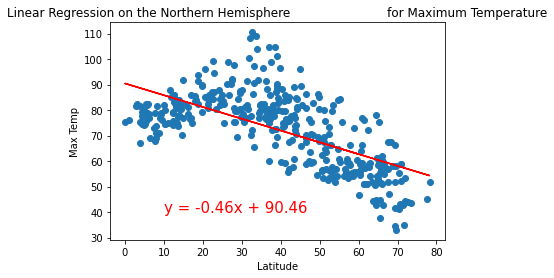

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

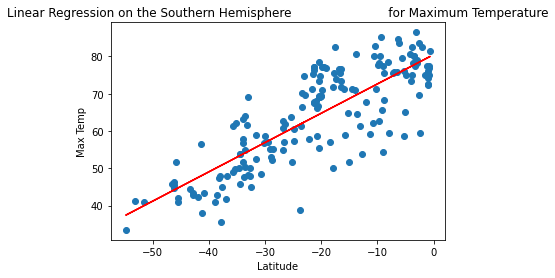

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

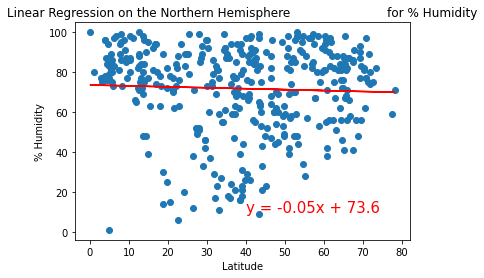

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

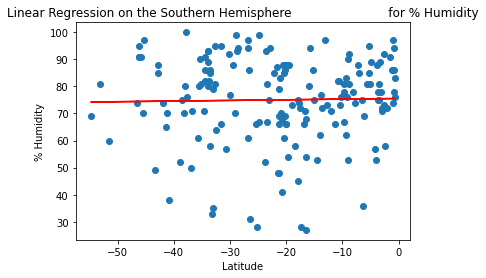

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

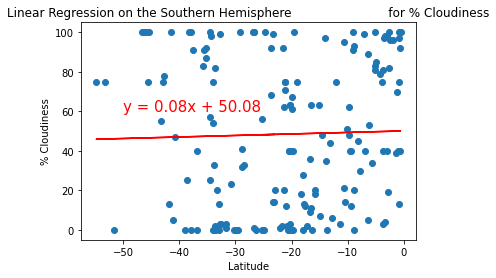

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

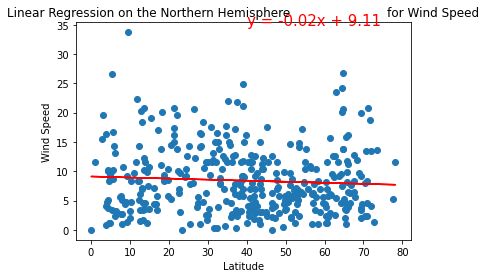

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

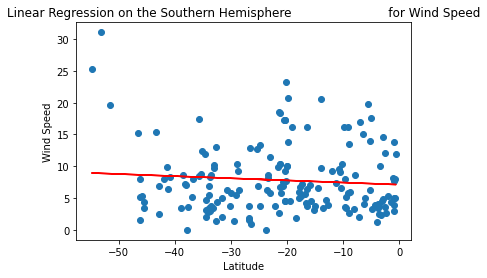

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))